In [11]:
import pandas as pd
import glob, os
import matplotlib.pyplot as plt
import numpy as np
from obspy.geodetics.base import gps2dist_azimuth

In [10]:
GPSlat = pd.read_csv('gps_lat.csv',names=['AUV','Buoy','Ship'])
GPSlon = pd.read_csv('gps_lon.csv',names=['AUV','Buoy','Ship'])

raysimu/time_001/envelop.csv
raysimu/time_002/envelop.csv


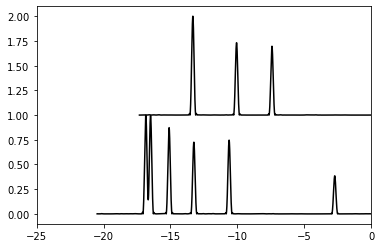

In [19]:
vel = 1533
for i, timepath in enumerate(sorted(glob.glob('raysimu/time_*/envelop.csv'))):
    Buoy_lat = 25+GPSlat['Buoy'].values[i]/60
    Buoy_lon = 121+GPSlon['Buoy'].values[i]/60
    Ship_lat = 25+GPSlat['Ship'].values[i]/60
    Ship_lon = 121+GPSlon['Ship'].values[i]/60
    dist,az,baz = gps2dist_azimuth(Ship_lat,Ship_lon,Buoy_lat,Buoy_lon)
    dist/vel
    print(timepath)
    df = pd.read_csv(timepath)
    
    time = df['time']
    data = df['envelop']
    plt.plot((time-dist/vel)*1000,data/max(data)+i,'k')
    plt.xlim(-25,0)
    # 
